# 1. Install Dependencies and Setup

In [ ]:
!pip install tensorflow opencv-python matplotlib

In [ ]:
pip list

In [2]:
import tensorflow as tf
import os

## 1.2 Remove bad images

In [4]:
import cv2
import imghdr

C:\Users\sluo5\AppData\Local\Temp\ipykernel_524\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
data_dir = 'data'

In [9]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [11]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list{}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image.path))

Image not in ext listdata\non-burnable\50-505-3F-540x540.jpg
Image not in ext listdata\non-burnable\Ceramics_Banner.jpg
Image not in ext listdata\non-burnable\DD50-001.webp
Image not in ext listdata\non-burnable\image51.webp
Image not in ext listdata\non-burnable\image52.webp
Image not in ext listdata\non-burnable\image53.webp
Image not in ext listdata\non-burnable\image54.webp
Image not in ext listdata\non-burnable\image55.webp
Image not in ext listdata\non-burnable\image56.webp
Image not in ext listdata\non-burnable\image57.webp
Image not in ext listdata\non-burnable\image58.webp
Image not in ext listdata\non-burnable\image59.webp
Image not in ext listdata\non-burnable\image60.webp
Image not in ext listdata\non-burnable\image61.webp
Image not in ext listdata\non-burnable\image62.webp
Image not in ext listdata\non-burnable\image63.webp
Image not in ext listdata\non-burnable\image64.webp
Image not in ext listdata\non-burnable\image65.webp
Image not in ext listdata\non-burnable\image66.

## 1.3 Load Data

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [14]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 5955 files belonging to 8 classes.


In [17]:
data_iterator = data.as_numpy_iterator()

In [19]:
# iterator to get another batch of data
batch = data_iterator.next()

In [21]:
# Images being represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [23]:
# Class 0 = burnable
# Class 1 = cans
# Class 2 = glass bottles
# Class 3 = non-burnable
# Class 4 = oversized waste
# Class 5 = pet bottles
# Class 6 = plastic materials
# Class 7 = recyclable paper
batch[1]

array([6, 2, 4, 6, 7, 1, 0, 2, 3, 6, 6, 4, 1, 3, 6, 1, 2, 0, 4, 4, 4, 7,
       5, 7, 7, 1, 1, 3, 6, 6, 3, 0])

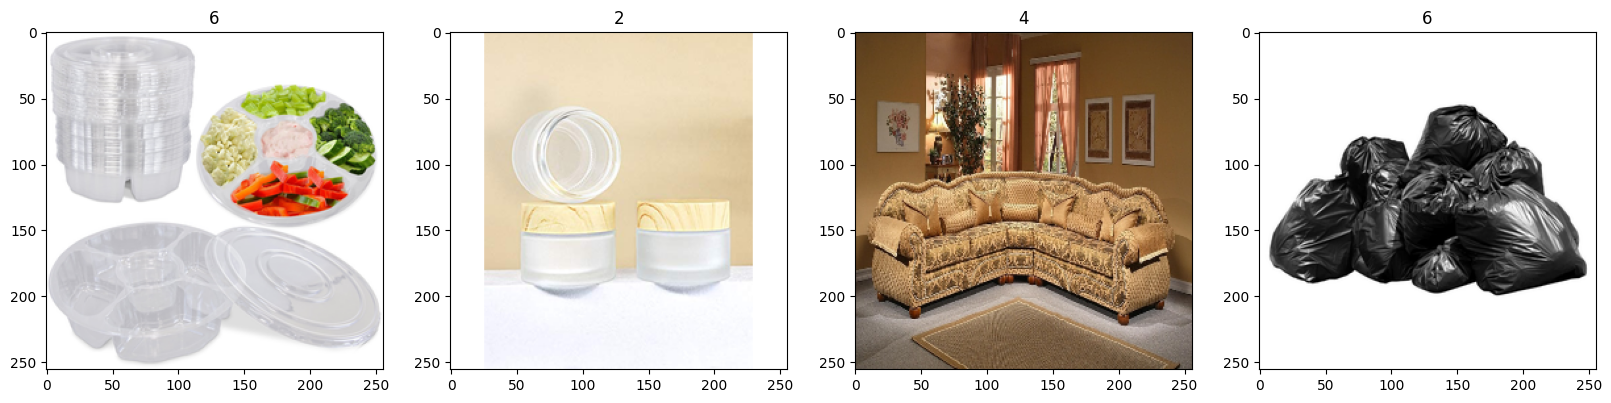

In [25]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2. Preprocess Data

## 2.1 Scale Data

In [29]:
data = data.map(lambda x,y: (x/255,y))

In [31]:
scaled_iterator = data.as_numpy_iterator()

In [33]:
batch = scaled_iterator.next()

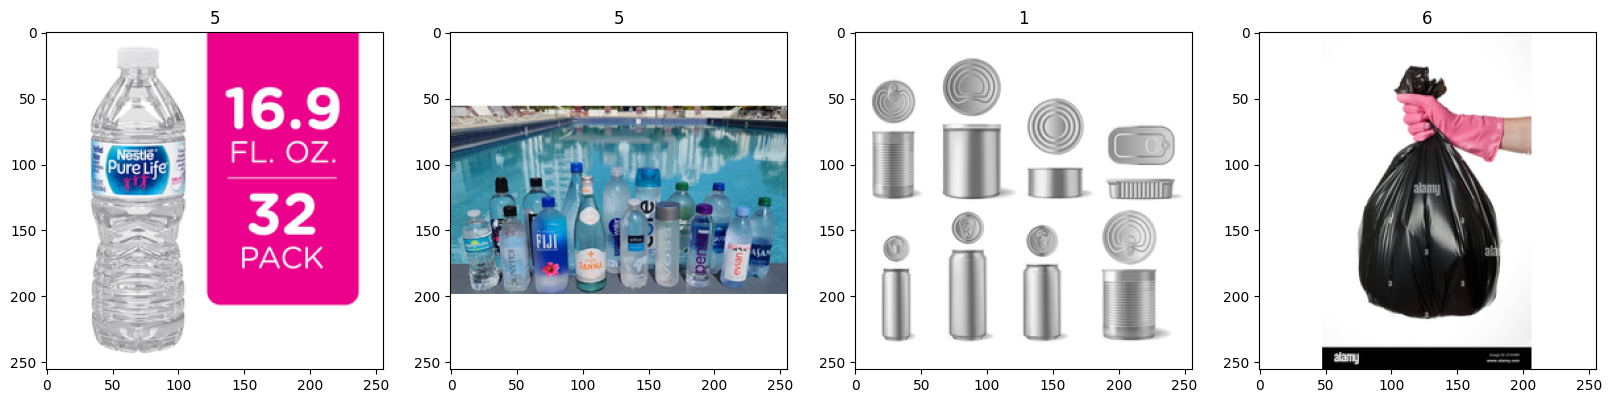

In [35]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 2.2 Split Data

In [38]:
len(data)

187

In [48]:
train_size = int(len(data)*.7)

In [50]:
val_size = int(len(data)*.2) + 1

In [52]:
test_size = int(len(data)*.1) + 1

In [54]:
train_size + val_size + test_size

187

In [56]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# 3. Deep Model

## 3.1 Build Deep Learning Modal

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# help with overfitting
from tensorflow.keras.callbacks import EarlyStopping

In [110]:
model = Sequential()

In [112]:
model.add(Input(shape=(256, 256, 3)))

model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))  # Adding dropout after the first MaxPooling layer

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))  # Adding dropout after the first MaxPooling layer

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))  # Adding dropout after the first MaxPooling layer

model.add(Flatten())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))  # Adding dropout after the first MaxPooling layer

# we have 8 classes so we need softmax activation function
model.add(Dense(8, activation='softmax'))

In [114]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [116]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │           2,056 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,698,424 (14.11 MB)

 Trainable params: 3,698,424 (14.11 MB)

 Non-trainable params: 0 (0.00 B)

In [118]:
logdir='logs'

In [120]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [122]:
# add early stopping for when val_loss does not improve for a set number of epoch
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [124]:
callbacks = [early_stopping, tensorboard_callback]

In [133]:
hist = model.fit(train, epochs=30, validation_data=(val), callbacks=callbacks)

Epoch 1/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 25s 190ms/step - accuracy: 0.5539 - loss: 1.5193 - val_accuracy: 0.5395 - val_loss: 1.6514
Epoch 2/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 25s 189ms/step - accuracy: 0.5628 - loss: 1.4937 - val_accuracy: 0.5444 - val_loss: 1.6341
Epoch 3/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 25s 189ms/step - accuracy: 0.5829 - loss: 1.4724 - val_accuracy: 0.5411 - val_loss: 1.6393
Epoch 4/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 25s 189ms/step - accuracy: 0.6020 - loss: 1.4201 - val_accuracy: 0.5288 - val_loss: 1.6274
Epoch 5/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 24s 188ms/step - accuracy: 0.6149 - loss: 1.3823 - val_accuracy: 0.5633 - val_loss: 1.5939
Epoch 6/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 25s 190ms/step - accuracy: 0.5999 - loss: 1.3791 - val_accuracy: 0.5707 - val_loss: 1.5958
Epoch 7/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 25s 192ms/step - accuracy: 0.6493 - loss: 1.3291 - val_accuracy: 0.5732 - val_loss: 1.5998
Epoch 8/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 25s 187ms/step - accuracy: 0.6481 - loss: 1

In [128]:
hist.history

{'accuracy': [0.13846154510974884,
  0.16826923191547394,
  0.19807691872119904,
  0.23605769872665405,
  0.28437501192092896,
  0.31802883744239807,
  0.3516826927661896,
  0.38605770468711853,
  0.40120193362236023,
  0.4233173131942749,
  0.4468750059604645,
  0.45721152424812317,
  0.4759615361690521,
  0.4838942289352417,
  0.5115384459495544,
  0.4975961446762085,
  0.526442289352417,
  0.5338942408561707,
  0.5543269515037537,
  0.5629807710647583],
 'loss': [6.003674030303955,
  4.383360862731934,
  3.5829691886901855,
  3.0832901000976562,
  2.748593330383301,
  2.5060112476348877,
  2.3254897594451904,
  2.1647844314575195,
  2.0652294158935547,
  1.9760030508041382,
  1.8899706602096558,
  1.8209131956100464,
  1.777248501777649,
  1.7248339653015137,
  1.6797736883163452,
  1.6558291912078857,
  1.5939738750457764,
  1.5855655670166016,
  1.5523850917816162,
  1.518158197402954],
 'val_accuracy': [0.1496710479259491,
  0.17927631735801697,
  0.2705592215061188,
  0.28207236

# 3.3 Plot Performance

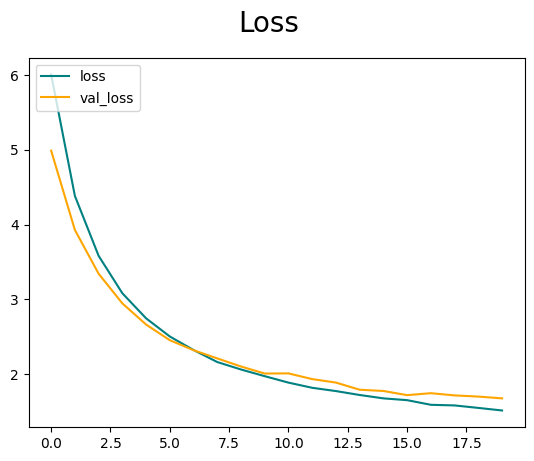

In [131]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

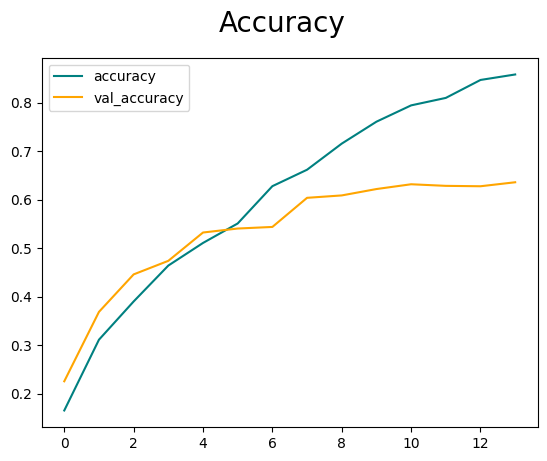

In [85]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate Performance

In [88]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [90]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [92]:
# Iterate over batches in the test dataset
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)

    # Check dimensions of yhat and y
    print("yhat shape:", yhat.shape)
    print("y shape:", y.shape)

    # Convert yhat to class predictions (for multi-class classification)
    if yhat.ndim == 2:  # shape (batch_size, num_classes)
        yhat_classes = np.argmax(yhat, axis=-1)
    else:
        raise ValueError("Unexpected shape for yhat")

    # Convert y to class indices if it is one-hot encoded
    if y.ndim == 2:  # shape (batch_size, num_classes)
        y_classes = np.argmax(y, axis=-1)
    elif y.ndim == 1:  # shape (batch_size,)
        y_classes = y
    else:
        raise ValueError("Unexpected shape for y")

    # Update metrics
    pre.update_state(y_classes, yhat_classes)
    re.update_state(y_classes, yhat_classes)
    acc.update_state(y_classes, yhat_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
yhat shape: (32, 8)
y shape: (32,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
yhat shape: (32, 8)
y shape: (32,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
yhat shape: (32, 8)
y shape: (32,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
yhat shape: (32, 8)
y shape: (32,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
yhat shape: (32, 8)
y shape: (32,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
yhat shape: (32, 8)
y shape: (32,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
yhat shape: (32, 8)
y shape: (32,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
yhat shape: (32, 8)
y shape: (32,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
yhat shape: (32, 8)
y shape: (32,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
yhat shape: (32, 8)
y shape: (32,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
yhat shape: (32, 8)
y shape: (32,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
yhat shape: (32, 8)
y shape: (32,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
yhat shape: (32, 8)
y shape: (32,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
yhat shape: 

In [94]:
# Compute metrics
precision_result = pre.result().numpy()
recall_result = re.result().numpy()
accuracy_result = acc.result().numpy()

print(f"Precision: {precision_result}")
print(f"Recall: {recall_result}")
print(f"Accuracy: {accuracy_result}")

Precision: 0.9493177533149719
Recall: 0.9401544332504272
Accuracy: 0.4736842215061188


# Test

In [96]:
import cv2

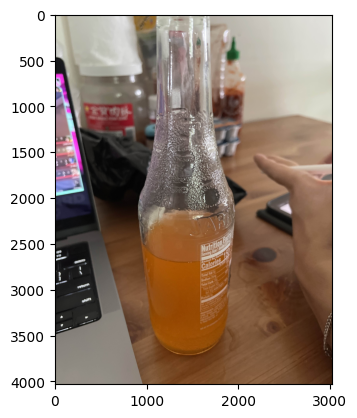

In [98]:
img = cv2.imread('IMG_1279.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

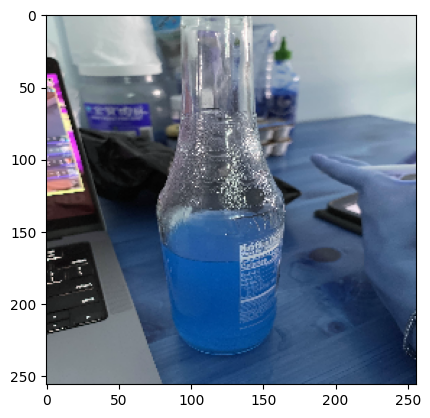

In [100]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [102]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [104]:
yhat

array([[0.03261007, 0.02511529, 0.03615512, 0.03133514, 0.03169818,
        0.6537694 , 0.17826054, 0.01105622]], dtype=float32)

In [106]:
# Class labels
class_labels = [
    'burnable',            # Class 0
    'cans',                # Class 1
    'glass bottles',       # Class 2
    'non-burnable',        # Class 3
    'oversized waste',     # Class 4
    'pet bottles',         # Class 5
    'plastic materials',   # Class 6
    'recyclable paper'     # Class 7
]

prob_array = yhat

# Traverse the array and map probabilities to class labels
for i, probs in enumerate(prob_array):
    # Find the index of the maximum probability
    predicted_class_index = np.argmax(probs)
    predicted_class_label = class_labels[predicted_class_index]
    
    print(f"Probabilities: {probs}")
    print(f"Predicted Class: {predicted_class_label} (Class {predicted_class_index})")

Probabilities: [0.03261007 0.02511529 0.03615512 0.03133514 0.03169818 0.6537694
 0.17826054 0.01105622]
Predicted Class: pet bottles (Class 5)
